# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 
## Homework 4: Predicting College Admissions

**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

<hr style="height:2.4pt">

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css"
).text
HTML(styles)

In [2]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score


<hr style="height:2pt">

### INSTRUCTIONS

- **THIS IS AN INDIVIDUAL ASSIGNMENT**. 

- To submit your assignment follow the instructions given in Canvas.

- This assignment **must be done individually**.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. Exceptions should be made for code with a long execution time, of course.
- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.
- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 
- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).
<hr style="height:2pt">

## Overview and Data Description

### Predicting admissions into elite universities

In this problem set we will model the chances of high school students being accepted into two different elite undergraduate colleges (one is elite at least :) ): Harvard and Yale.  The data are provided in the file `data/college_admissions.csv` and were scraped from [collegedata.com](https://www.collegedata.com/) (where applicants volunteer to share their information).  Each observation corresponds to an applicant to one of the two different colleges (note: the same applicant may show up in two rows: once for each college).  The main response is the `admitted` variable (1 = admitted, 0 = denied), and there are are several predictors to consider:

- **id**: a unique identifier for the applicant 
- **test**: a standardized measurement of the applicants highest ACT or SAT combined score (2400 is the maximum). 
- **ap**: the number of AP tests taken
- **avg_ap**: the average score on the AP tests taken (0 if no tests were taken)
- **sat_subjects**: the number of SAT subject tests taken
- **gpa**: the unweighted GPA of applicant (max of 4.0)
- **female**:  a binary indicator for gender: 1 = female, 0 = otherwise 
- **minority**: a binary indicator for under-represented minority: 1 = minority, 0 = otherwise 
- **international**: a binary indicator for international status: 1 = international, 0 = US
- **sports**: a binary indicator for HS All-American: 1 = all-American athlete, 0 = otherwise
- **school**: a categorical variable for school applied to: "Harvard" or "Yale"
- **early_app**: a binary indicator for application type: 1 = early action, 0 = regular
- **alumni**:  a binary indicator for parents' alumni status of school: 1 = a parent is an alumnus, 0 = otherwise
- **program**: the program applied to by the student with many choices (we will not use this as a predictor)
- **add_info**: additional (optional) info provided by applicant (we will not use this as a predictor)

The main set of 12 predictors is (note: you may need to modify this list when fitting different models, and your will be replacing the `school` variable with a binary `harvard` variable early in the questions below):

```python
[
    'test','ap','avg_ap','sat_subjects','gpa','female',
    'minority','international','sports','school','early_app','alumni'
]
```

Please use this dataset to answer the following questions below.

**Important notes:**

- **Unless stated otherwise, all logistic regression models should be unregularized (use `penalty="none"`) and include the intercept (which is the default in `sklearn`).**


- **When printing your output (e.g. coefficients, accuracy scores, etc.), DO NOT just print numbers without context. Please be certain provide clarifying labels for all printed numbers and limit the number of digits showing after decimals to a reasonable length (e.g. 4 decimal points for coefficients and accuracy scores).**


- **Also be sure to practice good data science principles: always use train to do analysis and never touch the test set until the very end.**

---

<div class='exercise'><b> Question 1 [16 pts]: Data Exploration using train and basic models </b></div>

The first step is to split the observations into an approximate 80-20 train-test split.  Below is some code to do this for you (we want to make sure everyone has the same splits). It also prints the dataset's shape before splitting and after splitting. 

**IMPORTANT:** While a valid argument could be made to scale our predictors here, please **DO NOT** do so **UNTIL** it is requested of you in **question 4.1**.

**1.1** What proportion of observations were admitted overall?  What would be the classification accuracy for a baseline "naive" model where we classified ALL applicants as either admitted or not admitted using just this overall proportion to make our decision (i.e. we apply the same outcome to all applicants based on this proportion)?


**1.2** Create a binary ('dummy') variable named `harvard` that takes on the value 1 if `school == "Harvard"` and 0 otherwise. Now, explore the marginal association of each of our 12 predictors with whether or not an applicant is admitted into the college they applied (`admitted`).  Create a separate **visual** for each predictor to investigage their relationship with college admissions.  **Suggestion:** place these 12 visuals in a *matrix* of subplots with 3 columns and 4 rows.

**Note:** We will be using our dummified `harvard` predictor instead of `school` throughout the remainder of this problem set.

**1.3** Based on the visuals above, which predictor seems to have the most potential for predicting `admitted`? Why do you think this it the best potential single predictor?


**1.4** Fit a logistic regression to predict `admitted` from `harvard` (call it `logit1_4`).  Interpret the coefficient estimates: which college is estimated to be easier to get into?  What are the estimated chances of getting into each school?


**1.5** Create a contingency table between `admitted` and `harvard`.  Use this table to calculate and confirm the coefficient estimates in the `logit1_4` model (both the intercept and slope).


**1.6** Compare the estimated probabilities of being admitted into the schools to the overall acceptance rate (as seen [here](https://www.ivycoach.com/2023-ivy-league-admissions-statistics/)).  Why may what you've observed in this comparison be the case?


In [3]:
#############################
## DO NOT MODIFY THIS CODE ##
#############################

college = pd.read_csv('data/college_admissions.csv')
np.random.seed(121)

college_train, college_test, = train_test_split(
    college, test_size=0.2,  random_state = 121, shuffle=True, stratify = college['school']
)

print(college.shape)
print(college_train.shape, college_test.shape)

(1871, 16)
(1496, 16) (375, 16)


<div class='exercise-r'>  
 
**1.1** What proportion of observations were admitted overall?  What would be the classification accuracy for a baseline "naive" model where we classified ALL applicants as either admitted or not admitted using just this overall proportion to make our decision (i.e. we apply the same outcome to all applicants based on this proportion)?
 
 
 </div>

For now, we will only use the training data in order to infer the predictive capacity of various models. In this question, we are trying to assess the quality of the following model: given no predictors, how well will we model the outcome variable, only based on the most represented training outcome. 

In [4]:
# your code here
y_train = college_train['admitted']
y_test = college_test['admitted']
print('According to our training split, the overall proportion of admitted students is ', np.mean(y_train))

According to our training split, the overall proportion of admitted students is  0.2627005347593583


Therefore, a baseline "naive" model where we would model all applicants as **not admitted** would have a training accuracy of $0.737$. This is a training score we will try to exceed by modelling in the right way the way the outcome variable depends on our different predictors. 

<div class='exercise-r'>  
 
**1.2** Create a binary ('dummy') variable named `harvard` that takes on the value 1 if `school == "Harvard"` and 0 otherwise. Now, explore the marginal association of each of our 12 predictors with whether or not an applicant is admitted into the college they applied (`admitted`).  Create a separate **visual** for each predictor to investigage their relationship with college admissions.  **Suggestion:** place these 12 visuals in a *matrix* of subplots with 3 columns and 4 rows.
 
 **Note:** We will be using our dummified `harvard` predictor instead of `school` throughout the remainder of this problem set.
 
 </div>

In [5]:
college['harvard'] = np.asarray(college['school']=="Harvard", dtype=np.int64)
college_train['harvard'] = np.asarray(college_train['school']=="Harvard", dtype=np.int64)
college_test['harvard'] = np.asarray(college_test['school']=="Harvard", dtype=np.int64)


C:\Users\David\Anaconda3\envs\cs109a\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\David\Anaconda3\envs\cs109a\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
predictors = ['test','ap','avg_ap','sat_subjects','gpa','female', 'minority','international','sports','harvard','early_app','alumni']
target = 'admitted'
categorical = ['female', 'ap', 'sat_subjects', 'minority', 'international', 'sports', 'early_app', 'alumni', 'harvard']

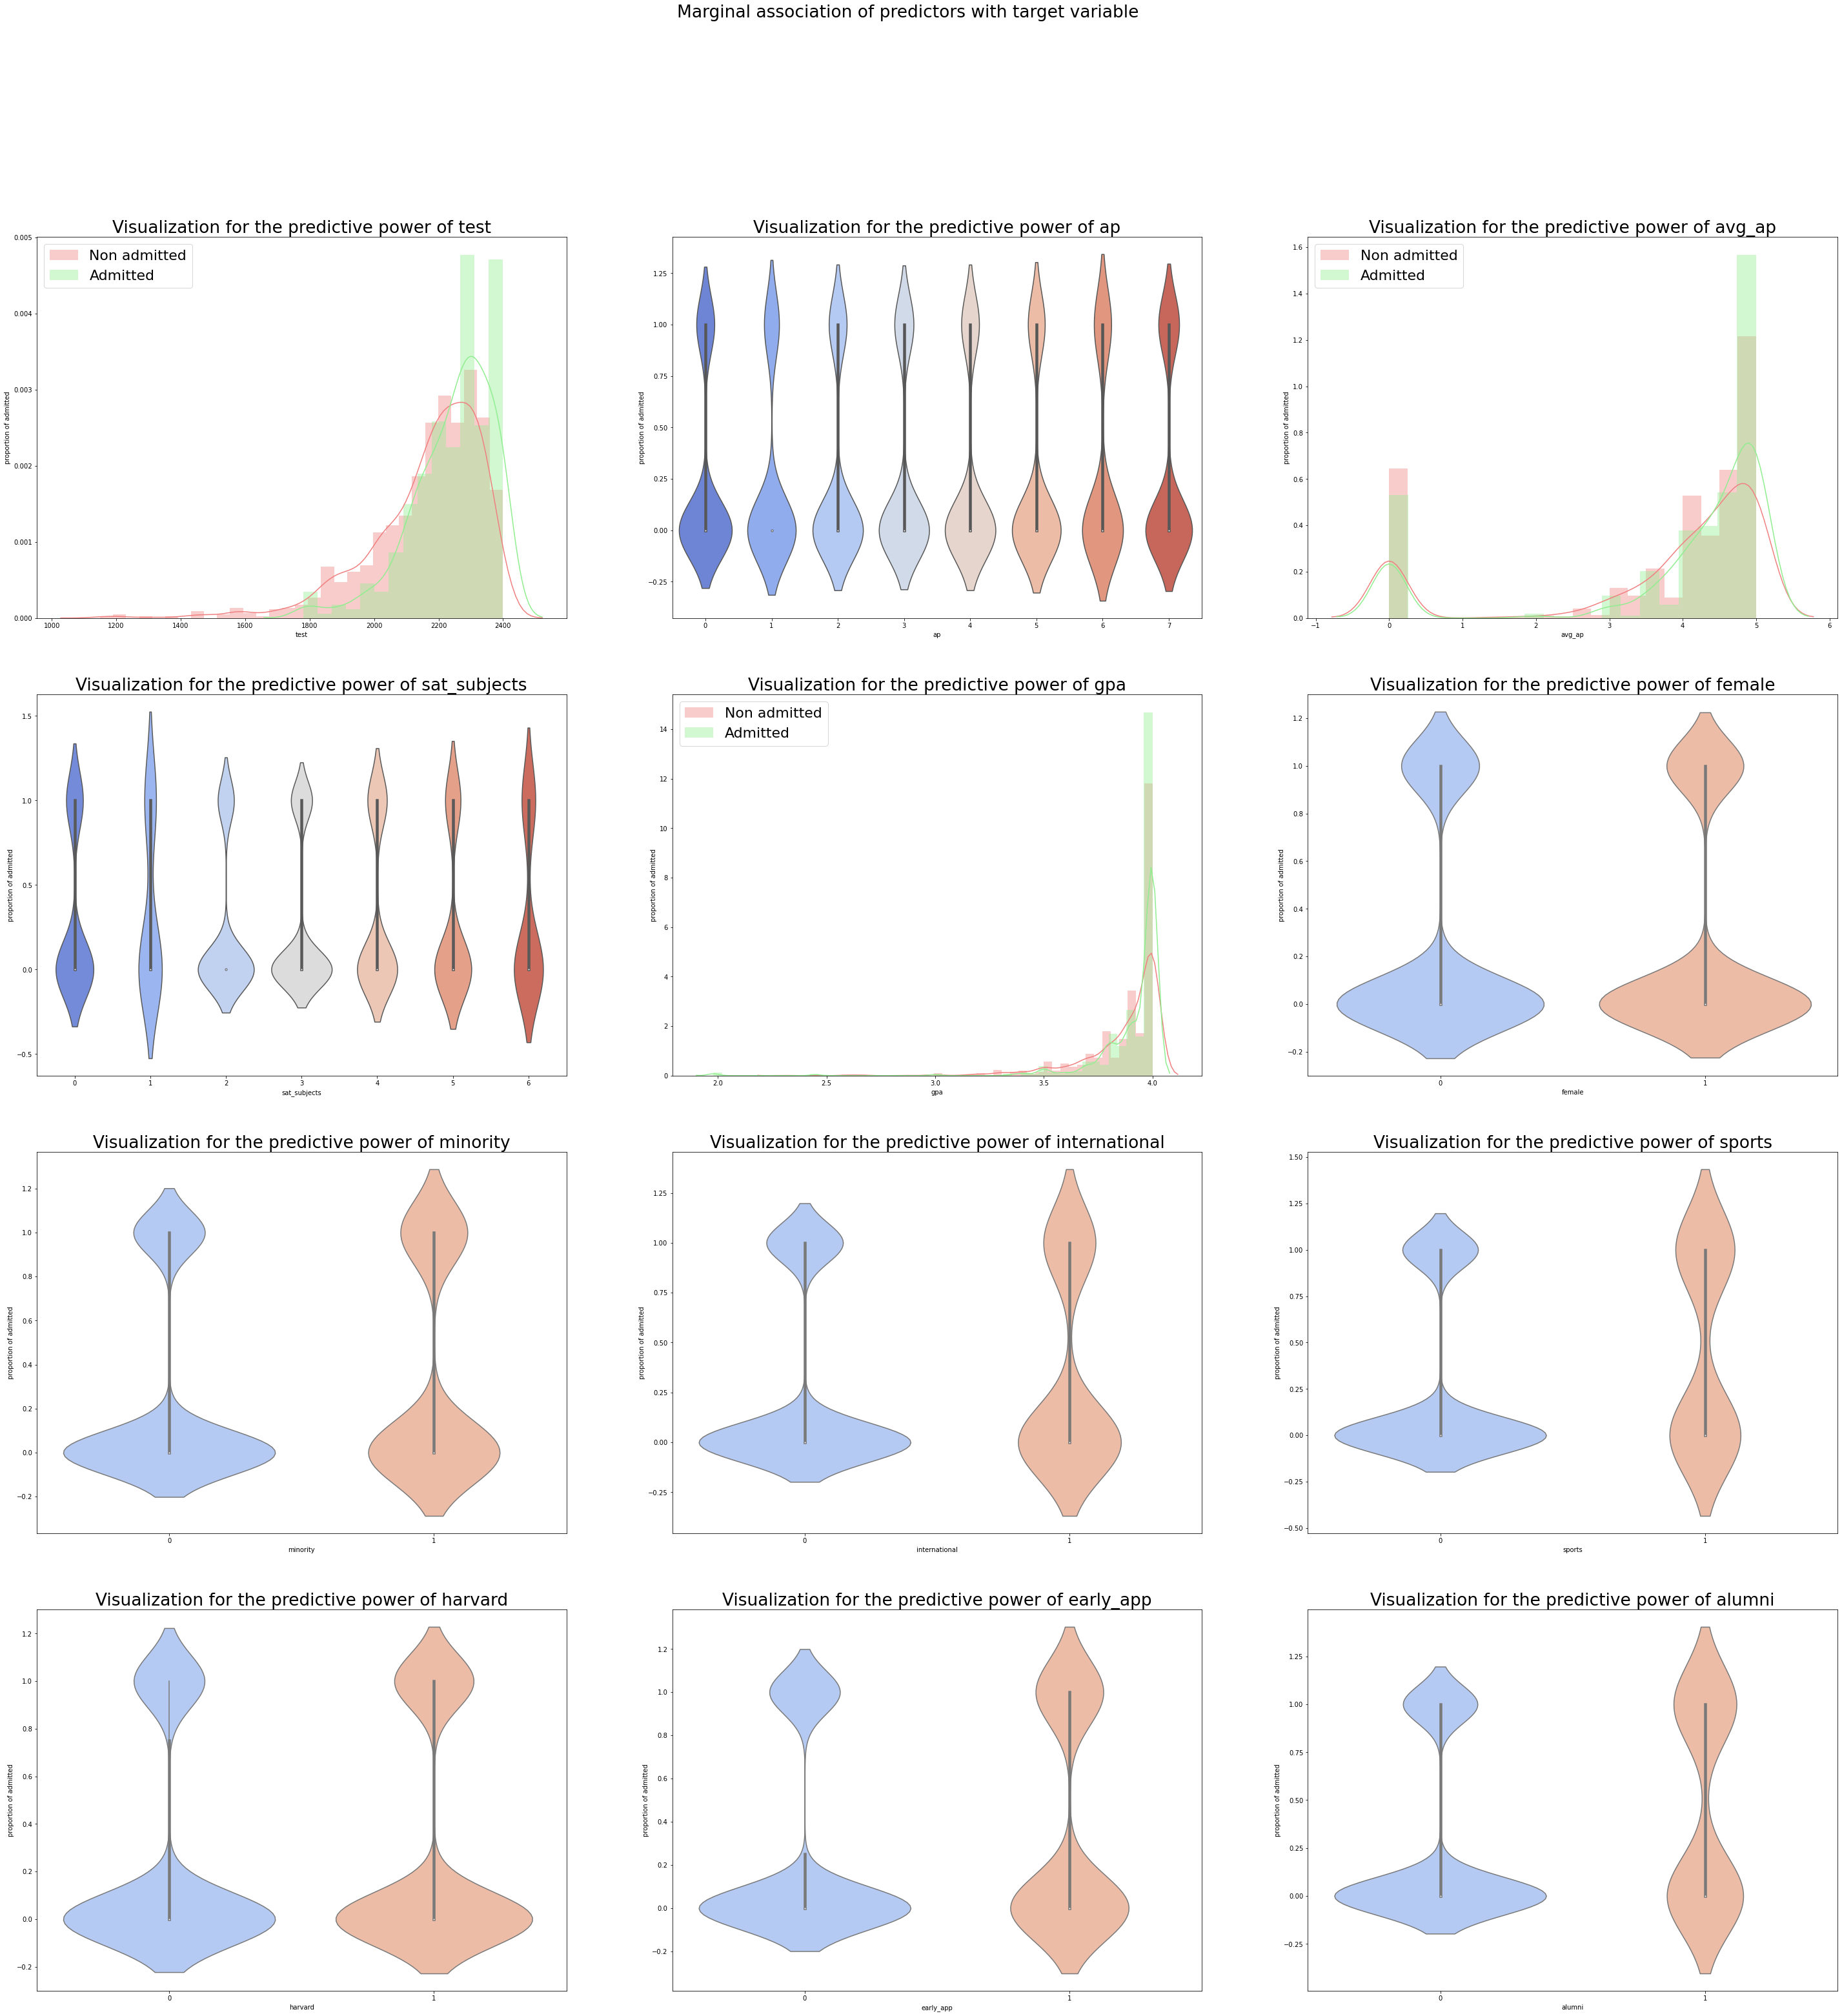

In [7]:
fig, ax = plt.subplots(4, 3, figsize = (50, 50))
plt.rcParams.update({'font.size': 22})
plt.suptitle('Marginal association of predictors with target variable')
for i, predictor in enumerate(predictors):
    if predictor in categorical:
        sns.violinplot(college[predictor], y=target, data=college, ax=ax[i//3, i%3], palette='coolwarm')
    else:
        sns.distplot(college_train[college_train['admitted']==0][predictor], ax = ax[i//3, i%3], color='lightcoral', label = 'Non admitted')
        sns.distplot(college_train[college_train['admitted']==1][predictor], ax = ax[i//3, i%3], color = 'lightgreen', label = 'Admitted')
        ax[i//3, i%3].legend()
    ax[i//3, i%3].set_title('Visualization for the predictive power of '+str(predictor))
    ax[i//3, i%3].set_xlabel(predictor)
    ax[i//3, i%3].set_ylabel('proportion of admitted')
plt.show()

<div class='exercise-r'>  
 
**1.3** Based on the visuals above, which predictor seems to have the most potential for predicting `admitted`? Why do you think this it the best potential single predictor?
 
 
 </div>

Based on the visuals above, I would say that the predictor having the most potential for predicting admitted is the predictor **alumni**. This is due to the fact that the variability of this predictor for admitted students vs non admitted students is high. Therefore, based on the sole information of alumni parents, we would be able to quite classsify if a student is admitted or not.   

<div class='exercise-r'>  
 
**1.4** Fit a logistic regression to predict `admitted` from `harvard` (call it `logit1_4`).  Interpret the coefficient estimates: which college is estimated to be easier to get into?  What are the estimated chances of getting into each school?
 
 
 </div>

In [8]:
logit1_4 = LogisticRegression(penalty='none')
logit1_4.fit(college_train['harvard'].values.reshape(-1, 1), y_train)
print(' Estimated intercept' , logit1_4.intercept_, '\n', 'Estimated beta coefficient', *logit1_4.coef_)

 Estimated intercept [-1.11365011] 
 Estimated beta coefficient [0.15318829]


Here, the probabilities we wish to model are:
$$
log(\frac{\mathbb{P}(y=1)}{\mathbb{P}(y=0)}) = \beta_0 + \beta_1*X
$$
Here, one specificity of our model is that our predictor $X$ is a binary variable. 
Thereofore, for a student applying to Harvard we have:
$$
log(\frac{\mathbb{P}(y=1)}{\mathbb{P}(y=0)}) = \beta_0 + \beta_1
$$
For a student applying to Yale we have 
$$
log(\frac{\mathbb{P}(y=1)}{\mathbb{P}(y=0)}) = \beta_0
$$
Here, since our estimate of $\beta_1$ is positive, it means that from our dataset and based only on the harvard predictor, a student applying to harvard has more chances to be admitted (non significative: there may be bias in the dataset, or the harvard variable may be corrleated with another variable like the students applying to harvard have higher gpas).

Estimate of getting into Harvard:
$$
\mathbb{P}(y=1|X=1) = \frac{1}{1+e^{-\beta_0-\beta_1}} = 0.277
$$
Estimate of getting into Yale:
$$
\mathbb{P}(y=1|X=0) = \frac{1}{1+e^{-\beta_0}}= 0.247
$$

In [9]:
intercept1_4 = logit1_4.intercept_[0]
linear1_4 = logit1_4.coef_[0][0]
p1 = 1/(1+np.exp(-intercept1_4-linear1_4))
p2 = 1/(1+np.exp(-intercept1_4))
print('Probability of getting into Harvard ', p1)
print('Probability of getting into Yale ', p2)

Probability of getting into Harvard  0.2767857404926041
Probability of getting into Yale  0.2471910225211202


<div class='exercise-r'>  
 
**1.5** Create a contingency table between `admitted` and `harvard`.  Use this table to calculate and confirm the coefficient estimates in the `logit1_4` model (both the intercept and slope).
 
 
 </div>

In [10]:
pd.crosstab(college['admitted'], college['harvard'])

harvard,0,1
admitted,,
0,667,699
1,223,282


From the column 0 (which is the column of students having applied to Yale), we can say estimate $\mathbb{P}(y=1|X=0)=\frac{223}{890}, \mathbb{P}(y=0|X=0)=\frac{667}{890} $.
Therefore, $log(\frac{\mathbb{P}(y=1|X=0)}{\mathbb{P}(y=0|X=0)}) = \frac{223}{667}$.
Therefore, $\beta_0 = log(\frac{223}{667}) = -1.095$.

For $\beta_1$, we do the same work but for the students applying to Harvard and get the equation $\beta_1 = log(\frac{282}{699})-\beta_0=0.1866$

<div class='exercise-r'>  
    
**1.6** Compare the estimated probabilities of being admitted into the schools to the overall acceptance rate (as seen [here](https://www.ivycoach.com/2023-ivy-league-admissions-statistics/)).  Why may what you've observed in this comparison be the case?
</div>

We observe that our estimated probabilities are completely off. There might be several reasons for that to happen:
- Our model is irrelevant. We try to determine the probability of getting into Harvard only based on the school the candidate applied to. This model is predicting the acceptance of a student based on the mean acceptance rate of the dataset, without taking into account other predictors.
- The source of the data: since students report the data on a voluntary basis, we may have no guarantee of the quality of this data
- The bias in the data: maybe students who are willing to report their results are students who mainly got into an ivy league school for example

---

<div class='exercise'><b> Question 2 [18 pts]: Interpretable Modeling </b></div>

**2.1** Fit a logistic regression model to predict `admitted` from `test` alone (call it `logit2_1`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data). 

**2.2** What are the estimated chances of an applicant being admitted with an *average* `test` score of 2200?  What about if they had a perfect test score of 2400?  What test score would be needed to have a 50-50 chance of being admitted?

**2.3**  Fit a logistic regression model to predict `admitted` from `test` and `avg_ap` (call it `logit2_3`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data). 

**2.4** Interpret the coefficient estimates in `logit2_3` (not the intercept) and compare the coefficient estimate for `test` to the one from `logit2_1`.  Why has this estimate changed?

**Hint:** You may want to inspect the relationship between `test` and `avg_ap` to help get a better sense for what might be happening here.

**2.5** Interpret and compare the classification accuracies for the two models (`logit2_1` and `logit2_3`).  Explain why these accuracies are the same or different, and what about the data makes these accuracies so similar of different? 


<div class='exercise-r'>  
 
**2.1** Fit a logistic regression model to predict `admitted` from `test` alone (call it `logit2_1`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data).
 
 </div>

In [11]:
# your code here
logit2_1 = LogisticRegression(penalty='none').fit(college_train['test'].values.reshape(-1, 1), y_train)
print(' Estimated intercept' , logit2_1.intercept_, '\n', 'Estimated beta coefficient', *logit2_1.coef_)
print(' Classification accuracy for this model on the Training Data', logit2_1.score(college_train['test'].values.reshape(-1, 1), y_train))
print(' Classification accuracy for this model on the Testing Data', logit2_1.score(college_test['test'].values.reshape(-1, 1), y_test))

 Estimated intercept [-9.41361091] 
 Estimated beta coefficient [0.00379223]
 Classification accuracy for this model on the Training Data 0.7372994652406417
 Classification accuracy for this model on the Testing Data 0.7013333333333334


<div class='exercise-r'>  
 
**2.2** What are the estimated chances of an applicant being admitted with an *average* `test` score of 2200?  What about if they had a perfect test score of 2400?  What test score would be needed to have a 50-50 chance of being admitted?
 
 </div>

In [12]:
# your code here
print('With an average test score of 2200, the chances of an applicant being admitted are ', logit2_1.predict_proba(np.array([2200]).reshape(1, -1))[0][1])
print('With an average test score of 2400, the chances of an applicant being admitted are ', logit2_1.predict_proba(np.array([2400]).reshape(1, -1))[0][1])

With an average test score of 2200, the chances of an applicant being admitted are  0.25526726916086456
With an average test score of 2400, the chances of an applicant being admitted are  0.42256096303306484


Having a 50-50 chance of being accepted means that we lie at the boundary of the decision. THerefore, we know what it is equivalent to solve $$\sum_{i=1}^p\beta_iX_i=0 \iff X = -\frac{\beta_0}{\beta_1} = 2482$$

In [13]:
print('Estimated score in order to get a 50-50 chance of being accepted ',  -logit2_1.intercept_[0]/logit2_1.coef_[0][0])

Estimated score in order to get a 50-50 chance of being accepted  2482.3445562682095


*Note: this score does not belong to the usual set of standardized scores. Therefore, when modelling admission vs test score from our dataset, it is impossible to get 50-50 chances of being admitted. Furthermore, based on this model, a student will never be accepted (using the Bayes classifier, which is used by default in the built-in sklearn predict function).*

<div class='exercise-r'>  
 
**2.3**  Fit a logistic regression model to predict `admitted` from `test` and `avg_ap` (call it `logit2_3`).  Print out the coefficient estimates (both intercept and slope) along with the classification accuracies for this model (on both train and test data).
 
 </div>

In [14]:
logit2_3 = LogisticRegression(penalty='none').fit(college_train[['test', 'avg_ap']].values, y_train)
print(' Estimated intercept' , logit2_3.intercept_, '\n', 'Estimated beta coefficient', *logit2_3.coef_)
print(' Classification accuracy for this model on the Training Data', logit2_3.score(college_train[['test', 'avg_ap']].values, y_train))
print(' Classification accuracy for this model on the Testing Data', logit2_3.score(college_test[['test', 'avg_ap']].values, y_test))


 Estimated intercept [-0.01884852] 
 Estimated beta coefficient [-0.00053657  0.05333145]
 Classification accuracy for this model on the Training Data 0.7372994652406417
 Classification accuracy for this model on the Testing Data 0.7013333333333334


<div class='exercise-r'>  
 
**2.4** Interpret the coefficient estimates in `logit2_3` (not the intercept) and compare the coefficient estimate for `test` to the one from `logit2_1`.  Why has this estimate changed?
 
 **Hint:** You may want to inspect the relationship between `test` and `avg_ap` to help get a better sense for what might be happening here.
 
 </div>

When using only the test predictor in the model logit2_1, the coefficient of the predictor *test* was positive. Now, after inserting the predictor *avg_ap*, the most imporant predictor (in terms of influence on the probability outcome) becomes avg_ap and the sign of *test* becomes negative. 

**How is it happening ?**  

First, since we are now in the case of a Multiple Logistic Regression, let us explore the interaction between predictors.

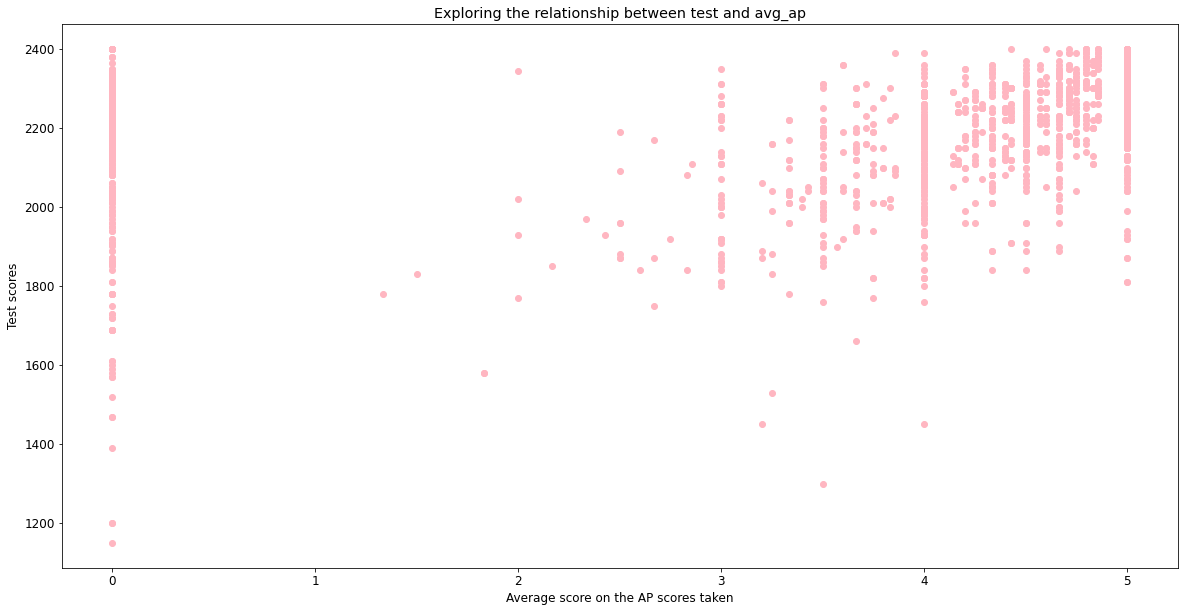

In [15]:
plt.figure(figsize = (20, 10))
plt.rcParams['font.size']=12
plt.xlabel('Average score on the AP scores taken')
plt.ylabel('Test scores')
plt.title('Exploring the relationship between test and avg_ap')
plt.scatter(college_train['avg_ap'], college_train['test'], color='lightpink')
plt.show()

In [16]:
print(np.corrcoef(college_train['avg_ap'], college_train['test']))

[[1.         0.37605989]
 [0.37605989 1.        ]]


Therefore, we can see that the predictors *test* and *avg_ap* are correlated between each others. In some sense, I understand the results that way: all the positive correlation between *test* and *admitted* is captured in the relationship between *avg_ap* and *admitted* (since *avg_ap* and *test* are positively correlated). Now, the relationship between *test* and *admitted* becomes negative but the coefficient becomes much smaller.

<div class='exercise-r'>  
    
**2.5** Interpret and compare the classification accuracies for the two models (`logit2_1` and `logit2_3`).  Explain why these accuracies are the same or different, and what about the data makes these accuracies so similar of different?
</div>

We can see that both training accuracies for the two models are equal. But what is interesting is that those accuracies are equal to the one we foresaw when infering how a model predicting a constant value would behave. 
Let us further check this assumption.

In [17]:
print('The number of students in the test Set predicted as accepted by the model logit2_1 is ', np.sum(logit2_1.predict(college_test['test'].values.reshape(-1, 1))))
print('The number of students in the test Set predicted as accepted by the model logit2_3 is ', np.sum(logit2_3.predict(college_test[['test', 'avg_ap']].values)))

The number of students in the test Set predicted as accepted by the model logit2_1 is  0
The number of students in the test Set predicted as accepted by the model logit2_3 is  0


There might be several reasons for this to happen:

**Imbalance classes**: if the classes are highly unbalanced, it might be difficult for a classifier to learn the patterns to discriminate the underrepresented class.

**Irrelevant features**: the features are so uninformative that the model learns to output a constant prediction

In [18]:
print('The imbalance ratio in our dataset is ', len(college[college['admitted']==1])/len(college))

The imbalance ratio in our dataset is  0.2699091394975949


The classes are not *highly* imbalanced. We might learn better using a better subset of predictors.

---

<div class='exercise'><b> Question 3 [30 pts]: Harvard and Yale? </b></div>


**3.1** Fit a logistic regression model (call it `logit3_1`) to predict `admitted` from 7 predictors: `['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']`.  Output and interpret the coefficient estimates for the binary predictors in this model.

**Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.

**3.2** Fit a logistic regression model (call it `logit3_2`) to predict `admitted` from 3 predictors: `['harvard', 'test', 'ap']` along with the 2 interaction terms: `harvard` with `test` and `harvard` with `ap`. Name the columns for these interaction terms something sensible.  Print out the coefficient estimates for this model.

**3.3** Simplify and write out mathematically the above model from question 3.2 for 2 applicants: (1) someone who is applying to Harvard and for (2) someone who is applying to Yale (keep `test` and `ap` as the unknown $X$s).  The basic framework given to you below may be helpful:

$$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$

**Note:** All of your mathematical statements should be written out in your markdown cells [using LaTeX](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd). Do not insert images of handwritten math!

**3.4** Determine two classification boundaries mathematically for the model in the previous part (using the estimated coefficients): What range of values of `test` as a function of `ap` would an applicant be predicted to more likely than not be admitted into the college they applied? If a student scored a perfect 2400 on `test`, what is the minimum number of AP tests they should take in order to have a better than 50% chance of being admitted into Harvard?

**3.5** Create two separate scatterplots (one for Harvard applicants and one for Yale applicants) with the predictor `test` on the y-axis and `ap` on the x-axis where `admitted` is color-coded and the marker denotes train vs. test data.  Then add the appropriate classification boundary from the previous part.  Compare these two plots (both the location of the boundaries and where the points lie around these boundaries).

**Note:** As always, please be certain (a) your plot is titled, (b) everything is clearly labeled, and (c) the plot itself is formatted in a manner that makes it easy to read and interpret.

**3.6** Fit a logistic regression model (call it `logit3_6`) to predict `admitted` from 4 predictors: `['harvard', 'test', 'female', 'minority']` along with 2 interaction terms: `harvard` with `female` and `harvard` with `minority`.  Print out the coefficient estimates for this model.

**3.7** Interpret the coefficients associated with `female` and `minority` (the two main effects AND the two interaction terms).

**3.8** Based on this sample, how does it appear that Harvard and Yale compare in admitting these groups?  Why would it be wrong to take this interpretation as truth?

<div class='exercise-r'>  
 
**3.1** Fit a logistic regression model (call it `logit3_1`) to predict `admitted` from 7 predictors: `['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']`.  Output and interpret the coefficient estimates for the binary predictors in this model.
 
 **Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.
 
 </div>

In [19]:
logit3_1 = LogisticRegression(penalty='none', max_iter = 500).fit(college_train[['harvard', 'test', 'ap', 'avg_ap', 'gpa', 'female', 'minority']].values, y_train)
print('The intercept of the model logit3_1 is ', *logit3_1.intercept_)
print('The coefficients of the model logit3_1 are ', *logit3_1.coef_)

The intercept of the model logit3_1 is  -1.1678538440799684
The coefficients of the model logit3_1 are  [ 0.14096359  0.0030274  -0.02023631  0.03132665 -1.73338101 -0.02704805
  0.45051184]


Since the intercept is negative, we can say that, fixing all the other features, we have less chances of being accepted than being non accepted. 

For the other predictors, we may say that, when we fix all the other predictors:
- Applying to Harvard increases the chances of being admitted
- Having higher test scores increases the chances of being admitted
- Passing more AP tests decreases the chances of being admitted
- Having better average AP scores increases the chances of being admitted
- Having a better gpa diminishes the chances of being admitted (**counterintuitive**)
- Being a female diminishes the chances of being admitted (**why ?**)
- Being from a minority community increases the chances of being admitted 

<div class='exercise-r'>  
 
**3.2** Fit a logistic regression model (call it `logit3_2`) to predict `admitted` from 3 predictors: `['harvard', 'test', 'ap']` along with the 2 interaction terms: `harvard` with `test` and `harvard` with `ap`. Name the columns for these interaction terms something sensible.  Print out the coefficient estimates for this model.
 
 </div>

In [20]:
import warnings
warnings.filterwarnings('ignore')
college_train['harvard_test'] = college_train['harvard']*college_train['test']
college_test['harvard_test'] = college_test['harvard']*college_test['test']
college_train['harvard_ap'] = college_train['harvard']*college_train['ap']
college_test['harvard_ap'] = college_test['harvard']*college_test['ap']

In [21]:
logit3_2 = LogisticRegression(penalty='none', max_iter = 500).fit(college_train[['harvard', 'test', 'ap', 'harvard_test', 'harvard_ap']].values, y_train)
print('The intercept of the model logit3_2 is ', *logit3_2.intercept_)
print('The coefficients of the model logit3_2 are ', *logit3_2.coef_)


The intercept of the model logit3_2 is  -7.134366547906171
The coefficients of the model logit3_2 are  [-4.44104399e+00  2.69091713e-03  2.39681431e-02  2.24400593e-03
 -1.10149293e-01]


<div class='exercise-r'>  
 
**3.3** Simplify and write out mathematically the above model from question 3.2 for 2 applicants: (1) someone who is applying to Harvard and for (2) someone who is applying to Yale (keep `test` and `ap` as the unknown $X$s).  The basic framework given to you below may be helpful:
 
 $$ \ln \left( \frac{P(Y=1)}{1-P(Y=1)} \right) = \beta_0 + \beta_1 X_1 + \dots + \beta_p X_p $$
 
 **Note:** All of your mathematical statements should be written out in your markdown cells [using LaTeX](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd). Do not insert images of handwritten math!
 
 </div>

The general probability equation for this model is:
$$ \ln ( \frac{P(Y=1|X)}{1-P(Y=1|X)}) = \beta_0 + \beta_{harvard} X_{harvard} + \beta_{test} X_{test} + \beta_{ap} X_{ap} + \beta_{harvard-test} X_{harvard-test} + \beta_{harvard-ap} X_{harvard-ap}$$
For someone who is applying to Harvard, with $X_{harvard}=1$, we get:
$$ \ln ( \frac{P(Y=1|X_{harvard}=1)}{1-P(Y=1|X_{harvard}=1)}) = (\beta_0 + \beta_{harvard}) + (\beta_{test} + \beta_{harvard-test})X_{test} + (\beta_{ap} +\beta_{harvard-ap})X_{ap}$$
For someone who is applying to Yale, with $X_{harvard}=0$, we get:
$$ \ln ( \frac{P(Y=1|X_{harvard}=0)}{1-P(Y=1|X_{harvard}=0)}) = \beta_0 + \beta_{test} X_{test} + \beta_{ap} X_{ap}$$

<div class='exercise-r'>  
 
**3.4** Determine two classification boundaries mathematically for the model in the previous part (using the estimated coefficients): What range of values of `test` as a function of `ap` would an applicant be predicted to more likely than not be admitted into the college they applied? If a student scored a perfect 2400 on `test`, what is the minimum number of AP tests they should take in order to have a better than 50% chance of being admitted into Harvard?
 
 </div>

##### For students applying to Harvard

For model 1, we are going to compute the classification boundary defining the hyperplane for classification. 

In [22]:
intercept_harvard = logit3_2.intercept_[0]+logit3_2.coef_[0][0]
beta_test_harvard = logit3_2.coef_[0][1]+logit3_2.coef_[0][3]
beta_ap_harvard = logit3_2.coef_[0][2]+logit3_2.coef_[0][4]
print(intercept_harvard, beta_test_harvard, beta_ap_harvard)

-11.575410542747429 0.0049349230657998785 -0.08618115030527533


Therefore, the classification boundary for someone applying to Harvard is: 
$$ -11.57 + 0.0049X_{test}-0.0086X_{ap}=0$$
In order for a student applying to Harvard being predicted as more likely to be admitted, his test value should be :
$$X_{test} > X_{test}^0 = 2361 + 1.755X_{ap}$$
If a studen scored a perfect 2400 on test, then the classification boundary becomes:
$$0.19 -0.0086X_{ap} = 0$$
In order to have better than 50% chances of being admitted into Harvard, we wish to have:
$$0.19 -0.0086X_{ap} > 0 \iff X_{ap} < 22$$
The maximum number of AP tests they should take is 22 based on the predictions of this model.

##### For students applying to Yale

In [23]:
intercept_yale = logit3_2.intercept_[0]
beta_test_yale = logit3_2.coef_[0][1]
beta_ap_yale = logit3_2.coef_[0][2]
print(intercept_yale, beta_test_yale, beta_ap_yale)

-7.134366547906171 0.0026909171342660992 0.023968143087352154


Therefore, the classification boundary for someone applying to Yale is: 
$$ -7.134 + 0.0027X_{test}+0.0024X_{ap}=0$$
In order for a student applying to Yale being predicted as more likely to be admitted, his test value should be :
$$X_{test} > X_{test}^0 = 2642 - 0.889X_{ap}$$

<div class='exercise-r'>  
 
**3.5** Create two separate scatterplots (one for Harvard applicants and one for Yale applicants) with the predictor `test` on the y-axis and `ap` on the x-axis where `admitted` is color-coded and the marker denotes train vs. test data.  Then add the appropriate classification boundary from the previous part.  Compare these two plots (both the location of the boundaries and where the points lie around these boundaries).
 
 **Note:** As always, please be certain (a) your plot is titled, (b) everything is clearly labeled, and (c) the plot itself is formatted in a manner that makes it easy to read and interpret.
 
 </div>

In [24]:
x_ap = np.arange(0, 8)
boundary_harvard = 2361 + 1.755*x_ap
boundary_yale = 2642 - 0.889*x_ap

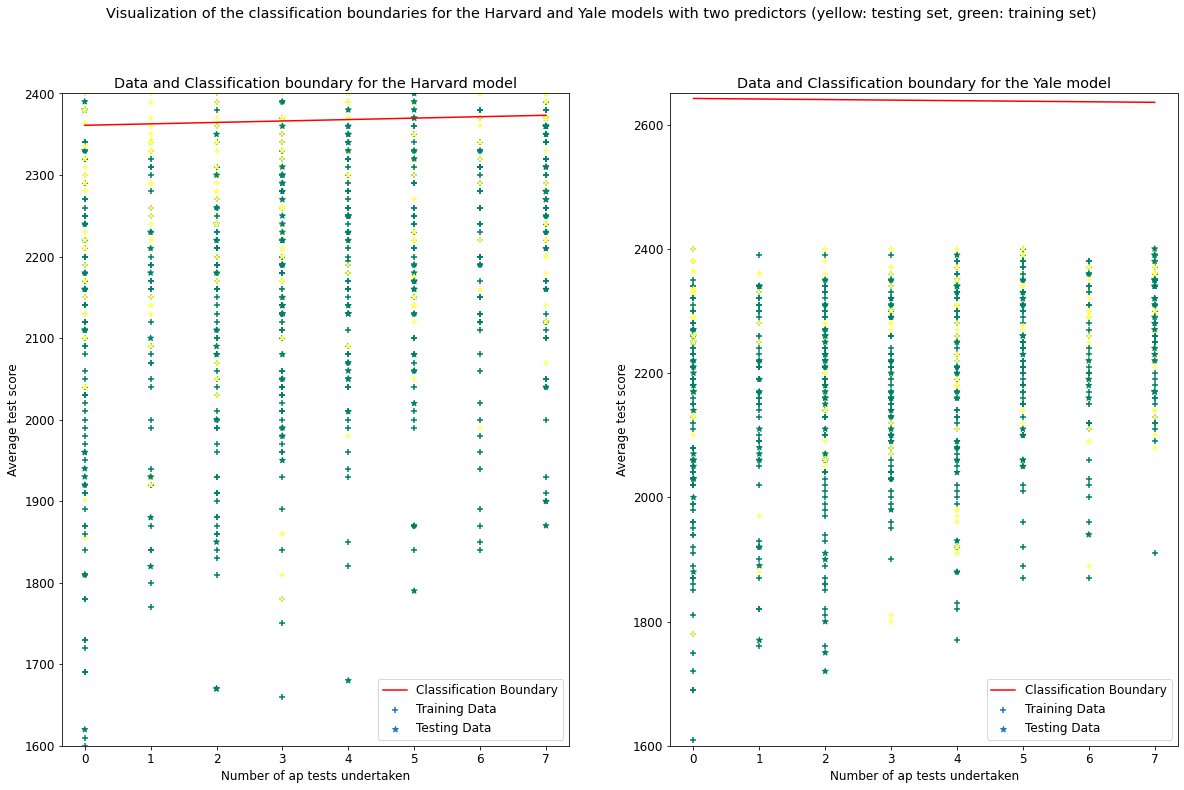

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(20, 12))
plt.suptitle('Visualization of the classification boundaries for the Harvard and Yale models with two predictors (yellow: testing set, green: training set)')
axs[0].scatter(college_train[college_train['harvard']==1]['ap'], college_train[college_train['harvard']==1]['test'], c=college_train[college_train['harvard']==1]['admitted'], marker='+', cmap='summer', label='Training Data')
axs[0].scatter(college_test[college_test['harvard']==1]['ap'], college_test[college_test['harvard']==1]['test'], c=college_test[college_test['harvard']==1]['admitted'], marker='*', cmap='summer', label='Testing Data')
axs[0].plot(x_ap, boundary_harvard, color='r', label='Classification Boundary')
axs[0].set_xlabel('Number of ap tests undertaken')
axs[0].set_ylabel('Average test score')
axs[0].set_ylim(1600, 2400)
axs[0].legend()
axs[0].set_title('Data and Classification boundary for the Harvard model')
axs[1].scatter(college_train[college_train['harvard']==0]['ap'], college_train[college_train['harvard']==0]['test'], c=college_train[college_train['harvard']==0]['admitted'], marker='+', cmap='summer', label='Training Data')
axs[1].scatter(college_test[college_test['harvard']==0]['ap'], college_test[college_test['harvard']==0]['test'], c=college_test[college_test['harvard']==0]['admitted'], marker='*', cmap='summer', label='Testing Data')
axs[1].plot(x_ap, boundary_yale, color='r', label='Classification Boundary')
axs[1].set_xlabel('Number of ap tests undertaken')
axs[1].set_ylabel('Average test score')
axs[1].set_ylim(1600, 2650)
axs[1].legend()
axs[1].set_title('Data and Classification boundary for the Yale model')
plt.show()

The classification boundary for the model for students applying to Harvard allow to separate some students and predict them as being accepted (we can see that for students with extreme test values, there are many students accepted). However, for the Yale model, we remain stuck in a constant majority prediction, which will be that students a re consistently rejected, when basing our approach only on test scores and number of ap tests undertaken.

<div class='exercise-r'>  
 
**3.6** Fit a logistic regression model (call it `logit3_6`) to predict `admitted` from 4 predictors: `['harvard', 'test', 'female', 'minority']` along with 2 interaction terms: `harvard` with `female` and `harvard` with `minority`.  Print out the coefficient estimates for this model.
 
 </div>

In [26]:
college_train['harvard_female'] = college_train['harvard']*college_train['female']
college_test['harvard_female'] = college_test['harvard']*college_test['female']
college_train['harvard_minority'] = college_train['harvard']*college_train['minority']
college_test['harvard_minority'] = college_test['harvard']*college_test['minority']
logit3_6 = LogisticRegression(penalty='none', max_iter = 500).fit(college_train[['harvard', 'test', 'female', 'minority', 'harvard_female', 'harvard_minority']].values, y_train)
print('The intercept of the model logit3_6 is ', *logit3_6.intercept_)
print('The coefficients of the model logit3_6 are ', *logit3_6.coef_)

The intercept of the model logit3_6 is  -11.128433071562231
The coefficients of the model logit3_6 are  [ 0.20228926  0.00441698 -0.11751222  1.34542649  0.35462627 -0.89615451]


<div class='exercise-r'>  
 
**3.7** Interpret the coefficients associated with `female` and `minority` (the two main effects AND the two interaction terms).
 
 </div>

Since the intercept is negative, we can say that, fixing all the other features, we have less chances of being accepted than being non accepted. 

For the other predictors, we may say that, when we fix all the other predictors:
- Applying to Harvard increases the chances of being admitted
- Having higher test scores increases the chances of being admitted
- Being a female diminishes the chances of being admitted (**why ?**)
- Being from a minority community increases the chances of being admitted 
- Applying to Harvard while being a female increases the chances of being admitted (0.35 - 0.11 = 0.24 for the resulting coefficient)
- Applying to Harvard while being from a minority diminishes the chances from being admitted when opposed to applying at Yale while being from a minority

<div class='exercise-r'>  
    
**3.8** Based on this sample, how does it appear that Harvard and Yale compare in admitting these groups?  Why would it be wrong to take this interpretation as truth?
</div>

Based on this sample, we could be tempted to conclude that:
- For females applicants, there are more chances of being admitted to harvard than being admitted to Yale
- For minority applicants, there are far more chances of being admitted to Yale than being admitted to Harvard.

It would be wrong to take this interpretation at truth because this would mean that the admission commitee is biased and favors groups over others. 

---

<div class='exercise'><b> Question 4 [24 pts]: Building Predictive Models for admitted </b></div>

**4.1** You were instructed to NOT scale predictors in the prior sections above. The primary reason for this was to focus instead on the interpretability of our logistic regression coefficients. However, as we're sure you noticed, the numeric scale among our different predictors varies greatly (i.e. `test` values are in the 1,000's while others are much, much smaller). In practice, we might want to put our predictors all on a similar scale, particularly for regression and/or distance-based algorithms such as $k$-NN classification. (1) Please explain why scaling under these circumstances might be important. Then, (2) actually apply standardized scaling to all of the **non-binary** predictors in our original set of 12 predictors (for both the training and test sets).

**Note:** These scaled predictors should be used instead of the original unscaled versions of the predictors for the remainder of this problem set.

**4.2** Fit a well-tuned $k$-NN classification model with main effects of all 12 predictors in it (call it `knn_model`).  Use `ks = [1,3,5,9,15,21,51,71,101,151,201]` and 3-fold cross-validation. Plot, on a single set of axes, your resulting cross-validation mean training and mean validation scores at each value $k$. Then, report your chosen $k$ and the classification accuracy on train and test for your final fitted model.

**4.3** Fit the full logistic regression model with main effects of all 12 predictors in it (call it `logit_full`). Print out the coefficient estimates and report the classification accuracy on train and test for this model.

**4.4** Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it (call it `logit_lasso`). Use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation.  Print out the coefficient estimates and report the classification accuracy on train and test for this model.

**4.5** Which predictors were deemed important in `logit_lasso`?  Which were deemed unimportant? 

**4.6** Fit a well-tuned Lasso-like logistic regression model with all important predictors from `logit_lasso` and all the 2-way interactions between them (call it `logit_lasso_interact`).  Again use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation. Report the classification accuracy on train and test for this model.

**4.7** How many of the predictors in our `logit_lasso_interact` model were deemed important and unimportant? (Feel free to just report on the number of them found to be important and unimportant. There is no need to list them all here.)

**Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.

<div class='exercise-r'>  
 
**4.1** You were instructed to NOT scale predictors in the prior sections above. The primary reason for this was to focus instead on the interpretability of our logistic regression coefficients. However, as we're sure you noticed, the numeric scale among our different predictors varies greatly (i.e. `test` values are in the 1,000's while others are much, much smaller). In practice, we might want to put our predictors all on a similar scale, particularly for regression and/or distance-based algorithms such as $k$-NN classification. (1) Please explain why scaling under these circumstances might be important. Then, (2) actually apply standardized scaling to all of the **non-binary** predictors in our original set of 12 predictors (for both the training and test sets).
 
 **Note:** These scaled predictors should be used instead of the original unscaled versions of the predictors for the remainder of this problem set.
 
 </div>

We have seen two cases where the scaling of our predictors is important:
- Regularized Linear Regression: although the coefficient estimation is scaled-independent for simple Linear Regression, when penalizing our optimization problem, the penalization constraint depends explicitely on the scale of the coefficients, which is now dependent on the scale of the predictors. So we want to scale our predictors **before** performing any kind of coefficient-based regularization. 
- k-NN classification: the predictions we make are based on the distance to the nearest neighbors. However, we have seen in section#4 that this distance heavily relies on the scale of the predictors.

The features we are going to scale are : test, ap, avg_ap, sat_subjects, gpa

In [27]:
to_standardize = ['test', 'ap', 'avg_ap', 'sat_subjects', 'gpa']
scaler = StandardScaler()
scaler.fit(college_train[to_standardize])
college_train[to_standardize] = scaler.transform(college_train[to_standardize])
college_test[to_standardize] = scaler.transform(college_test[to_standardize])

We plot hear the first five rows of our dataframe in order to check whether we have standardized the correct features

In [28]:
college_train.head(5)

,id,admitted,test,ap,avg_ap,sat_subjects,gpa,female,minority,international,...,school,early_app,alumni,program,add_info,harvard,harvard_test,harvard_ap,harvard_female,harvard_minority
584,JTEQOV7ZCB,0,-0.620373,0.670275,0.397578,0.880745,0.108169,1,0,0,...,Harvard,1,0,Mechanical Engineering,Swimming 3 years Water Polo 3 years Foreign La...,1,2080,5,1,0
1817,I03PV24OHY,1,0.026486,1.098976,-0.033874,0.105233,0.459517,1,0,0,...,Yale,0,0,legal studies,horseback riding 5 hrs week year round marchin...,0,0,0,0,0
1308,K42SAOUYJJ,0,-0.267541,-0.615828,0.456413,0.105233,-0.895683,0,0,0,...,Yale,0,0,Film,Lacrosse Film Club Take Action Club NYU Tisch ...,0,0,0,0,0
1336,LODYYSRTYZ,0,-0.385152,1.098976,-0.229989,0.105233,0.610095,1,0,0,...,Yale,1,0,Biological Sciences,Varsity Orchestra Music Librarian 10 11 12 Vio...,0,0,0,0,0
3,OC717EAKXN,1,1.261399,0.670275,0.750585,1.656256,0.610095,1,0,0,...,Harvard,0,0,Mathematics,NaN,1,2400,5,1,0


<div class='exercise-r'>  
 
**4.2** Fit a well-tuned $k$-NN classification model with main effects of all 12 predictors in it (call it `knn_model`).  Use `ks = [1,3,5,9,15,21,51,71,101,151,201]` and 3-fold cross-validation. Plot, on a single set of axes, your resulting cross-validation mean training and mean validation scores at each value $k$. Then, report your chosen $k$ and the classification accuracy on train and test for your final fitted model.
 
 </div>

In [29]:
np.random.seed(121) # Do not delete or modify this line of code
predictors = ['test','ap','avg_ap','sat_subjects','gpa','female', 'minority','international','sports','harvard','early_app','alumni']
X_train, y_train = college_train[predictors], college_train['admitted']
X_test, y_test = college_test[predictors], college_test['admitted']
ks = [1,3,5,9,15,21,51,71,101,151,201]
validation_scores = []
training_scores = []
for k in ks:
    kNN = KNeighborsClassifier(n_neighbors = k)
    scores = cross_validate(kNN, X_train, y_train, cv=3, return_train_score=True, scoring='accuracy')
    validation_scores.append(np.mean(scores['test_score']))
    training_scores.append(np.mean(scores['train_score']))
best_k = ks[np.argmax(validation_scores)]

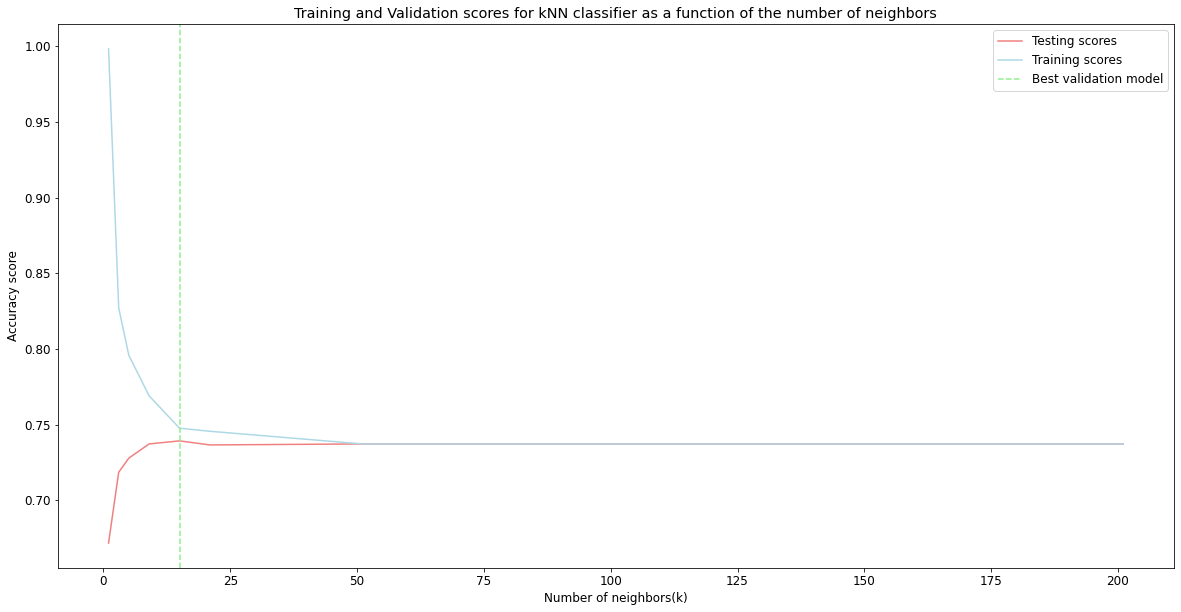

In [30]:
fig, ax =plt.subplots(1, figsize=(20, 10))
ax.plot(ks, validation_scores, color='lightcoral', label='Testing scores')
ax.plot(ks, training_scores, color='lightblue', label='Training scores')
ax.set_xlabel('Number of neighbors(k)')
ax.set_ylabel('Accuracy score')
ax.set_title('Training and Validation scores for kNN classifier as a function of the number of neighbors')
ax.axvline(best_k, color='lightgreen', label='Best validation model', linestyle='--')
ax.legend()
plt.show(fig)

My udnerstanding of the above plot is that, when our number of neighbors is $k > 50$, our model becomes the one with constant prediction. This is due to the fact that classes are imbalanced and, when the number of neighbors is too large, the prediominant class in every neighborhood is the non-admitted class. This is why the training and validation performances become equal to 0.73.

In [31]:
best_accuracy = {}

In [32]:
knn_model = KNeighborsClassifier(n_neighbors = best_k)
knn_model.fit(X_train, y_train)
training_accuracy = knn_model.score(X_train, y_train)
testing_accuracy = knn_model.score(X_test, y_test)
print(' Classification accuracy for the best kNN model on the Training Data:', training_accuracy)
print(' Classification accuracy for the best kNN model on the Testing Data:', testing_accuracy)
best_accuracy['knn_model'] = testing_accuracy

 Classification accuracy for the best kNN model on the Training Data: 0.7520053475935828
 Classification accuracy for the best kNN model on the Testing Data: 0.7306666666666667


<div class='exercise-r'>  
 
**4.3** Fit the full logistic regression model with main effects of all 12 predictors in it (call it `logit_full`). Print out the coefficient estimates and report the classification accuracy on train and test for this model.
 
 </div>

In [33]:
# your code here
logit_full = LogisticRegression(penalty='none', max_iter = 500).fit(X_train, y_train)
training_accuracy_logit_full = logit_full.score(X_train, y_train)
testing_accuracy_logit_full = logit_full.score(X_test, y_test)
print('The intercept of the model logit_full is ', *logit_full.intercept_)
print('The coefficients of the model logit_full are ', *logit_full.coef_)
print(' Classification accuracy for model logit_full on the Training Data:', training_accuracy_logit_full)
print(' Classification accuracy for model logit_full on the Testing Data:', testing_accuracy_logit_full)
best_accuracy['logit_full']= testing_accuracy_logit_full

The intercept of the model logit_full is  -1.7090456480416356
The coefficients of the model logit_full are  [ 0.78376257 -0.14026115  0.09748676 -0.09522492  0.10555637  0.05184133
  0.91650275  0.45002024  1.23340691  0.25807203  0.37369277  0.66291156]
 Classification accuracy for model logit_full on the Training Data: 0.7453208556149733
 Classification accuracy for model logit_full on the Testing Data: 0.7146666666666667


<div class='exercise-r'>  
 
**4.4** Fit a well-tuned Lasso-like logistic regression model from all 12 predictors in it (call it `logit_lasso`). Use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation.  Print out the coefficient estimates and report the classification accuracy on train and test for this model.
 
 </div>

In [34]:
# your code here
Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
validation_scores = []
training_scores = []
for C in Cs:
    lasso = LogisticRegression(penalty='l1', C=C, solver='saga')
    scores = cross_validate(lasso, X_train, y_train, cv=3, return_train_score=True, scoring='accuracy')
    validation_scores.append(np.mean(scores['test_score']))
    training_scores.append(np.mean(scores['train_score']))
best_C = Cs[np.argmax(validation_scores)]

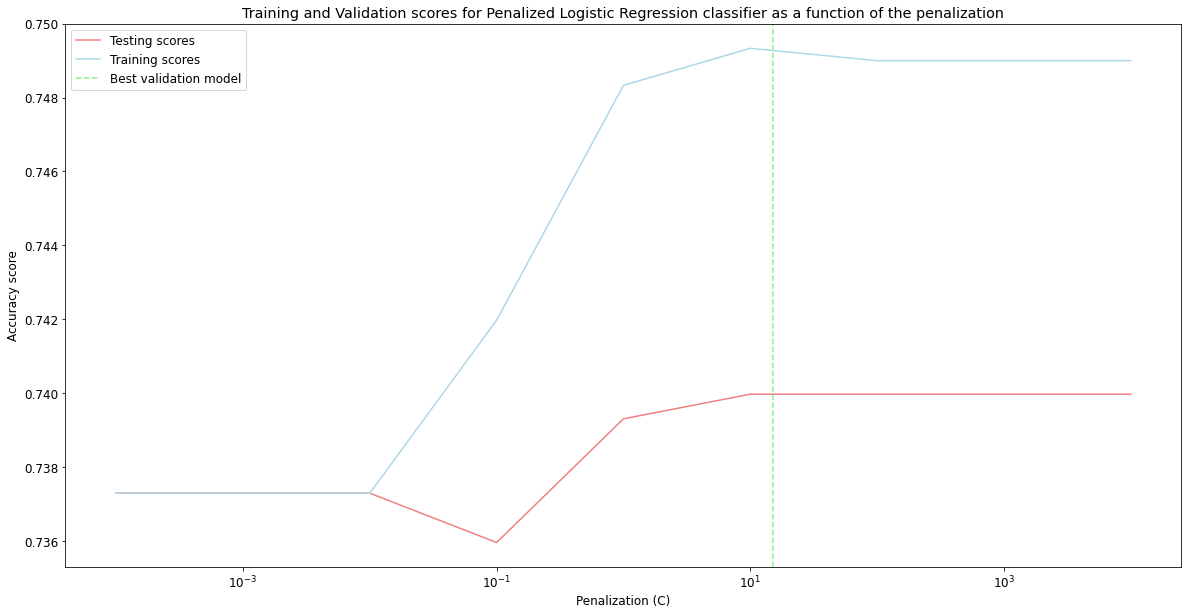

In [35]:
fig, ax =plt.subplots(1, figsize=(20, 10))
ax.set_xscale('log')
ax.plot(Cs, validation_scores, color='lightcoral', label='Testing scores')
ax.plot(Cs, training_scores, color='lightblue', label='Training scores')
ax.set_xlabel('Penalization (C)')
ax.set_ylabel('Accuracy score')
ax.set_title('Training and Validation scores for Penalized Logistic Regression classifier as a function of the penalization')
ax.axvline(best_k, color='lightgreen', label='Best validation model', linestyle='--')
ax.legend()
plt.show(fig)

Why do we still see this behavior for small C = hard constraint on predictors ? With hard constraint on predictors, only a few (no?) predictors will be retained. And as we have already seen before, when performing classification with only a small number of predictors, our model is not enough statistically significant in order to predict the underrepresented class and outputs constant predictions.

In [36]:
logit_lasso = LogisticRegression(penalty='l1', C=best_C, solver='saga')
logit_lasso.fit(X_train, y_train)
training_accuracy_logit_lasso_full = logit_lasso.score(X_train, y_train)
testing_accuracy_logit_lasso_full = logit_lasso.score(X_test, y_test)
print('The intercept of the model logit_lasso is ', *logit_lasso.intercept_)
print('The coefficients of the model logit_lasso are ', *logit_lasso.coef_)
print(' Classification accuracy for model logit_lasso on the Training Data:', training_accuracy_logit_lasso_full)
print(' Classification accuracy for model logit_lasso on the Testing Data:', testing_accuracy_logit_lasso_full)
best_accuracy['logit_lasso'] = testing_accuracy_logit_lasso_full

The intercept of the model logit_lasso is  -1.7033247394687403
The coefficients of the model logit_lasso are  [ 0.78226309 -0.13878299  0.09527256 -0.09439647  0.10458264  0.0501623
  0.91279078  0.4408734   1.2215176   0.25560352  0.37092249  0.65680525]
 Classification accuracy for model logit_lasso on the Training Data: 0.7453208556149733
 Classification accuracy for model logit_lasso on the Testing Data: 0.7146666666666667


<div class='exercise-r'>  
 
**4.5** Which predictors were deemed important in `logit_lasso`?  Which were deemed unimportant?
 
 </div>

In [37]:
important_coefs = {k:v for (k,v) in dict(zip(predictors, *logit_lasso.coef_)).items() if np.abs(v) > 0.1}
print('The predictors that were deemed important in logit_lasso are ',list(important_coefs.keys()))

The predictors that were deemed important in logit_lasso are  ['test', 'ap', 'gpa', 'minority', 'international', 'sports', 'harvard', 'early_app', 'alumni']


<div class='exercise-r'>  
 
**4.6** Fit a well-tuned Lasso-like logistic regression model with all important predictors from `logit_lasso` and all the 2-way interactions between them (call it `logit_lasso_interact`).  Again use `Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]` and 3-fold cross-validation. Report the classification accuracy on train and test for this model.
 
 </div>

In [38]:
important_predictors = list(important_coefs.keys())
final_important_predictors = [p for p in important_predictors]
for i, predictor in enumerate(important_predictors):
    for j, predictor_interact in enumerate(important_predictors[i+1:]):
        interact_name = predictor + '_' + predictor_interact
        X_train[interact_name] = X_train[predictor]*X_train[predictor_interact]
        X_test[interact_name] = X_test[predictor]*X_test[predictor_interact]
        final_important_predictors.append(interact_name)
Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
validation_scores = []
training_scores = []
for C in Cs:
    lasso = LogisticRegression(penalty='l1', C=C, solver='saga')
    scores = cross_validate(lasso, X_train[final_important_predictors], y_train, cv=3, return_train_score=True, scoring='accuracy')
    validation_scores.append(np.mean(scores['test_score']))
    training_scores.append(np.mean(scores['train_score']))
best_C = Cs[np.argmax(validation_scores)]

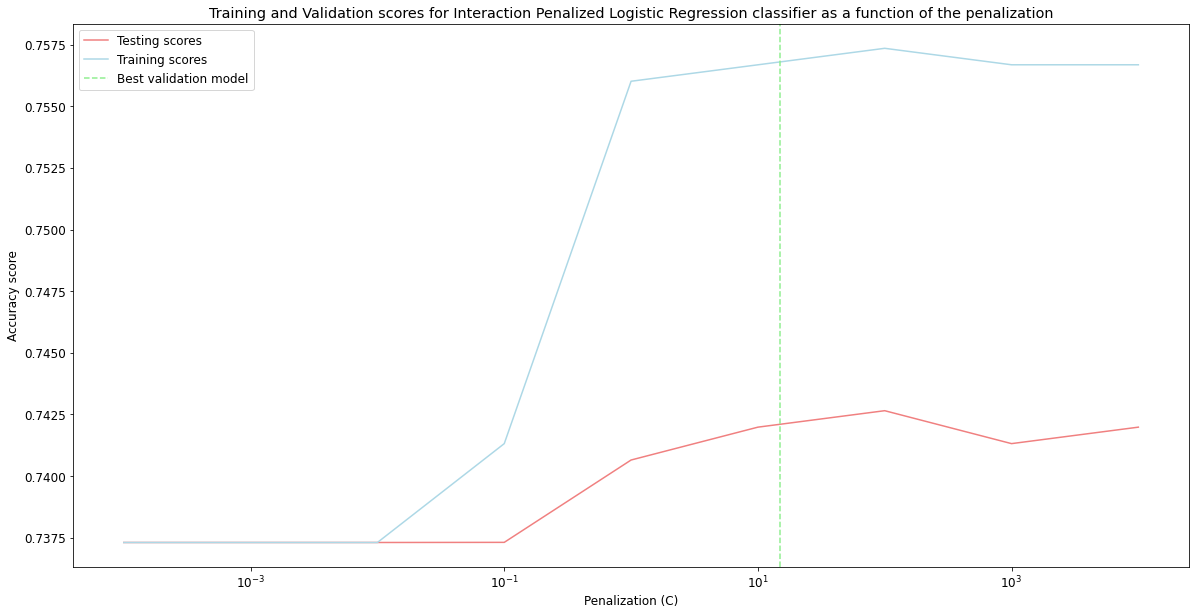

In [39]:
fig, ax =plt.subplots(1, figsize=(20, 10))
ax.set_xscale('log')
ax.plot(Cs, validation_scores, color='lightcoral', label='Testing scores')
ax.plot(Cs, training_scores, color='lightblue', label='Training scores')
ax.set_xlabel('Penalization (C)')
ax.set_ylabel('Accuracy score')
ax.set_title('Training and Validation scores for Interaction Penalized Logistic Regression classifier as a function of the penalization')
ax.axvline(best_k, color='lightgreen', label='Best validation model', linestyle='--')
ax.legend()
plt.show(fig)

In [40]:
logit_lasso_interact = LogisticRegression(penalty='l1', C=best_C, solver='saga')
logit_lasso_interact.fit(X_train[final_important_predictors], y_train)
training_accuracy_logit_lasso_interact_full = logit_lasso_interact.score(X_train[final_important_predictors], y_train)
testing_accuracy_logit_lasso_interact_full = logit_lasso_interact.score(X_test[final_important_predictors], y_test)
print('The intercept of the model logit_lasso_interact is ', *logit_lasso_interact.intercept_)
print('The coefficients of the model logit_lasso_interact are ', *logit_lasso_interact.coef_)
print(' Classification accuracy for model logit_lasso_interact on the Training Data:', training_accuracy_logit_lasso_interact_full)
print(' Classification accuracy for model logit_lasso_interact on the Testing Data:', testing_accuracy_logit_lasso_interact_full)
best_accuracy['logit_lasso_interact'] = testing_accuracy_logit_lasso_interact_full

The intercept of the model logit_lasso_interact is  -1.5933889844442035
The coefficients of the model logit_lasso_interact are  [ 0.55121565  0.05475456  0.11922183  0.97236778  0.11922006  0.74798422
  0.20207448  0.44223925  0.35412334 -0.05784547  0.14692994  0.12413471
  0.24944184 -0.02671339  0.30550818 -0.26503872  0.70940559 -0.07812885
  0.18086263 -0.18938413 -0.09640471 -0.26601442 -0.15299214  0.27069918
  0.24170245  0.14031352 -0.21870573 -0.03474494  0.01139823  0.10514727
 -0.25873186 -0.03407579 -0.2539191   0.1202836   0.18828085 -0.07991227
  0.1086688  -0.18994619  0.0379849   0.24279622  0.37863772  0.00572792
 -0.14552895  0.34725519  0.01060613]
 Classification accuracy for model logit_lasso_interact on the Training Data: 0.7566844919786097
 Classification accuracy for model logit_lasso_interact on the Testing Data: 0.7066666666666667


<div class='exercise-r'>  
 
**4.7** How many of the predictors in our `logit_lasso_interact` model were deemed important and unimportant? (Feel free to just report on the number of them found to be important and unimportant. There is no need to list them all here.)
 
 **Hint:** If you have convergence warnings, increasing the maximum number of iterations to 500 (`max_iter=500`) will likely solve the issue.
 </div>

In [41]:
important_coefs = {k:v for (k,v) in dict(zip(predictors, *logit_lasso_interact.coef_)).items() if np.abs(v) > 0.1}
print('The number of predictors that were deemed important in logit_lasso are',len(list(important_coefs.keys())))

The number of predictors that were deemed important in logit_lasso are 10


---

<div class='exercise'><b> Question 5 [12 pts]: Evaluating Results </b></div>


**5.1** Which of the 4 models in problem 4 perform the best based on classification accuracy?  Which performs the worst? Based on these accuracies, how do these models perform compared to your baseline "naive" model back in question 1.1?

**5.2** Draw the four ROC curves on the same set of axes using the test data.  How do these ROC curves compare?  Do the ROC curves support that the best model identified in question 5.1 is better than the worst model identified in 5.1?  How do you know?

**5.3** Calculate and report AUC for all 4 models.  Do the rankings of these 4 models based on AUC match those for classification accuracy?  Why do you think this is the case?

**5.4** If you were to use one of these 4 models to present as a prediction model for the website [collegedata.com](https://www.collegedata.com/), which would you use?  What may be the biggest issue if this was a publicly available tool for college applicants to use to determine their chances of getting into Harvard and/or Yale?


<div class='exercise-r'>  
 
**5.1** Which of the 4 models in problem 4 perform the best based on classification accuracy?  Which performs the worst? Based on these accuracies, how do these models perform compared to your baseline "naive" model back in question 1.1?
 
 </div>

The performances of our previous model on the testing set are: 

In [42]:
best_accuracy

{'knn_model': 0.7306666666666667,
 'logit_full': 0.7146666666666667,
 'logit_lasso': 0.7146666666666667,
 'logit_lasso_interact': 0.7066666666666667}

The best performances, based on classificatio accuracy on the testing set, are achieved by the kNN model obtained with $k = 15$.
The worst performances are obtained by the l1-penalized logistic regression including interaction terms. Let us evaluate what the testing accuracy of a model predicting constant output would be **on this test set**. 

In [43]:
print('The testing accuracy of our baseline model would be ', 1-np.mean(y_test))

The testing accuracy of our baseline model would be  0.7013333333333334


Therefore, all of our models perform better than our baseline "naive" model.

<div class='exercise-r'>  
 
**5.2** Draw the four ROC curves on the same set of axes using the test data.  How do these ROC curves compare?  Do the ROC curves support that the best model identified in question 5.1 is better than the worst model identified in 5.1?  How do you know?
 
 </div>

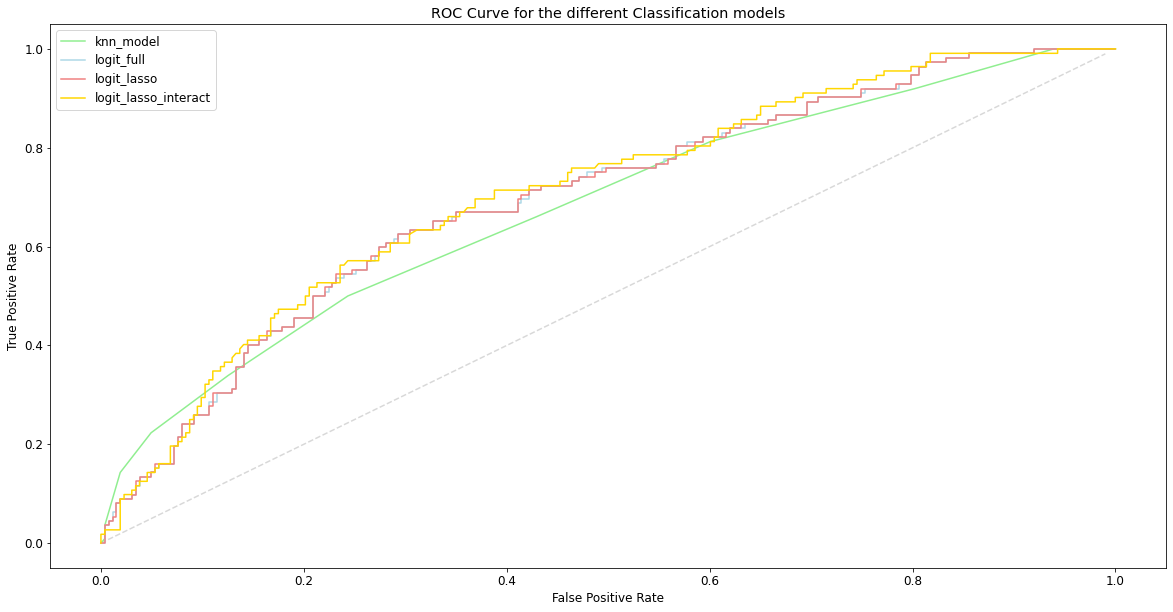

In [44]:
# your code here
models = [knn_model, logit_full, logit_lasso, logit_lasso_interact]
list_predictors = [predictors, predictors, predictors, final_important_predictors]
colors = ['lightgreen', 'lightblue', 'lightcoral', 'gold']
AUCS = []
fig, ax = plt.subplots(1, figsize=(20, 10))
x=np.arange(0,100)/100
plt.plot(x,x,'--',color="gray",alpha=0.3)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve for the different Classification models")
for i, model in enumerate(models):
    y_pred = model.predict_proba(X_test[list_predictors[i]])[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    AUCS.append(metrics.auc(fpr, tpr))
    plt.plot(fpr,tpr,label=list(best_accuracy.keys())[i], color=colors[i])
plt.legend()
plt.show()


These ROC are quite alike for the three different models. An interesting point is that the order implied by test accuracy is not the same asif we were using the ROC in order to rank our models. For instance, it appears that the Area Under the ROC curve is greater for the logit_lasso_interact model (worse accuracy) than the one for the knn_model (best accuracy).

<div class='exercise-r'>  
 
**5.3** Calculate and report AUC for all 4 models.  Do the rankings of these 4 models based on AUC match those for classification accuracy?  Why do you think this is the case?
 
 </div>

In [45]:
# your code here
dict(zip(list(best_accuracy.keys()), AUCS))

{'knn_model': 0.6787072243346007,
 'logit_full': 0.6964964693101575,
 'logit_lasso': 0.6966662140141229,
 'logit_lasso_interact': 0.7083276751765346}

Actually, the ranking using AUC metrics is opposite to the one using accuracy score. I belive it is due to the thing that fine-tuning our model on accuracies will tend to push our model to disregard the minor class (admitted) and only take into account the non-admitted students. Therefore, having higher accuracy leads to lower AUC since the AUC takes into account the in-class accuracy.

<div class='exercise-r'>  
    
**5.4** If you were to use one of these 4 models to present as a prediction model for the website [collegedata.com](https://www.collegedata.com/), which would you use?  What may be the biggest issue if this was a publicly available tool for college applicants to use to determine their chances of getting into Harvard and/or Yale?
</div>

If I were to use one of these 4 models to present as a prediction model, I think I would go for the logit_lasso_interact model. Indeed, my preferences are that I would rather my model be less biased towards the over-represented class (I cannot afford to deploy a model that would always predict a student as being non-admitted). 